In [42]:
# Plot up some harmonic output results
import dask


In [44]:
dask.config.set(scheduler='processes')


In [45]:
import xarray as xr
import numpy as np

from matplotlib import rcParams

rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

import matplotlib.pyplot as plt

In [46]:
romsfiles = ['../DATA/ROMS_NWS_2km_2017_2019_{}_Harmonics.nc'.format(ii) for ii in ['SSH','u','v']]
#romsfile = '../DATA/ROMS_NWS_2km_2017_2019_u_Harmonics.nc'

ds = xr.open_mfdataset(romsfiles)
ds

<xarray.Dataset>
Dimensions:      (Ntide: 35, bath: 1, eta_psi: 481, eta_rho: 482, eta_u: 482, eta_v: 481, one: 1, xi_psi: 1009, xi_rho: 1010, xi_u: 1009, xi_v: 1010)
Coordinates:
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lat_u        (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lon_u        (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lat_v        (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    lon_v        (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
Dimensions without coordinates: Ntide, bath, eta_psi, eta_rho, eta_u, eta_v, one, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    xl           (one) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    el           (one) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    JPRJ         |S2 b'ME'
    spherical    (one) |S1 dask.array<chunksize=(1,), meta=np.ndarray>
    depthmin     (one) int16 dask.array<chunksize=(1,), meta=np.ndarray>
    depthmax     (one) int16 dask.array<chunksize=(1,), meta=np.ndarray>
    hraw         (bath, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 482, 1010), meta=np.ndarray>
    h            (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    f            (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    pm           (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    pn           (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    dndx         (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    dmde         (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    x_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    y_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    x_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    y_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    x_u          (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    y_u          (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    x_v          (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    y_v          (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    lat_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    lon_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    mask_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    mask_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    mask_v       (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    mask_psi     (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    angle        (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    diff_factor  (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    visc_factor  (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    Tcline       float32 150.0
    Vstretching  int32 4
    Vtransform   int32 2
    hc           float32 150.0
    theta_b      float64 2.0
    theta_s      float64 6.0
    N            float64 30.0
    SSH_var      (eta_rho, xi_rho) float32 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    SSH_aa       (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    SSH_Aa       (Ntide, eta_rho, xi_rho) float64 dask.array<chunksize=(35, 482, 1010), meta=np.ndarray>
    SSH_Ba       (N

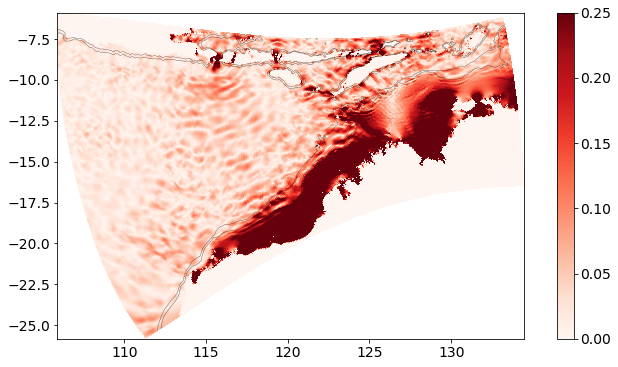

In [69]:
# Plot a map of the M2 harmonic amplitude
na = 3

ff = 0 # Fixed harmonic index [M2, S2, N2, K1, O1]

con = (ff+1)*(2*na+1)-na-1 # Location of the fixed harmonic

con -= 0

# Real and imaginary amplitudes
amp_re = ds['v_Aa'][con,...]
amp_im = ds['v_Ba'][con,...]

plt.figure(figsize=(12,6))
plt.pcolormesh(ds.lon_rho, ds.lat_rho, np.abs(amp_re + 1j*amp_im), cmap='Reds', vmax=0.25)
plt.colorbar()
plt.contour(ds.lon_rho, ds.lat_rho, ds.h, [200,500], colors='k', linewidths=0.25)
plt.gca().set_aspect('equal')
# plt.title('$M_2$ SSH annual modulation amplitude [m]')